In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/tmp/ipykernel_31/3443713206.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 1, 'NO': 0, 'N': 0})


✅ Accuracy: 0.9677
✅ Precision: 0.9833
✅ F1 Score: 0.9833
✅ Confusion Matrix:
[[ 1  1]
 [ 1 59]]


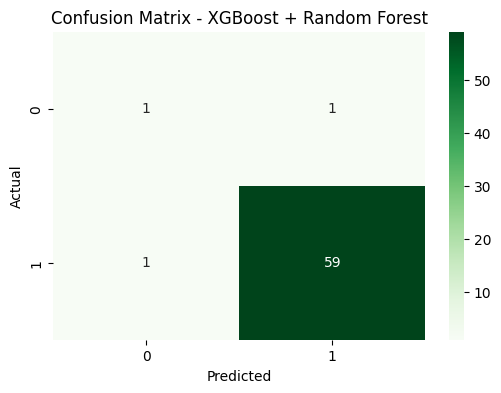

In [8]:
# 📦 Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

# 📂 Load Dataset
df = pd.read_csv('/kaggle/input/lung-cancer-detection/survey lung cancer.csv')



# 🧹 Preprocessing
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 1, 'NO': 0, 'N': 0})

# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 🚀 XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 🔗 Hybrid Voting Classifier
hybrid_model = VotingClassifier(
    estimators=[('xgb', xgb), ('rf', rf)],
    voting='soft'  # Use 'soft' to average probabilities
)

# 🏋️‍♂️ Train
hybrid_model.fit(X_train, y_train)

# 🔍 Predict
y_pred = hybrid_model.predict(X_test)

# 📊 Evaluation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# 📈 Results
print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print("✅ Confusion Matrix:")
print(cm)

# 🔲 Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - XGBoost + Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [7]:
import os
print(os.listdir('/kaggle/input/lung-cancer-detection'))


['survey lung cancer.csv']
